# Assets Valuation System using Fuzzy Logic

In [1]:
pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# needed libraries
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

## Fuzzy Input Set Ranges

In [3]:
# ranges of the sets
x_house_market = np.arange(0, 1000, 1) # Market value ₹ x10^5
x_house_location = np.arange(0, 10, .01) # location of house
x_person_asset = np.arange(0,1000, 1) # Asset ₹ x10^5
x_person_income = np.arange(0,100, .1) # income ₹ x10^5

## Defining the Fuzzy Inputs Sets

In [4]:
# house market value sets
market_low = fuzz.trapmf(x_house_market, [0, 0, 50, 100])
market_medium = fuzz.trapmf(x_house_market, [50, 100, 200, 250])
market_high = fuzz.trapmf(x_house_market, [200, 300, 650, 850])
market_very_high = fuzz.trapmf(x_house_market, [650, 850, 1000, 1000])

# house location sets
location_bad = fuzz.trapmf(x_house_location, [0, 0, 1.5, 4])
location_fair = fuzz.trapmf(x_house_location, [2.5, 5, 6, 8.5])
location_excellent = fuzz.trapmf(x_house_location, [6, 8.5, 10, 10])

# person asset sets
p_asset_low = fuzz.trimf(x_person_asset, [0, 0, 150])
p_asset_medium = fuzz.trapmf(x_person_asset, [50, 250, 500, 650])
p_asset_high = fuzz.trapmf(x_person_asset, [500, 700, 1000, 1000])

# person income sets
p_income_low = fuzz.trapmf(x_person_income, [0, 0, 10, 25])
p_income_medium = fuzz.trimf(x_person_income, [15, 35, 55])
p_income_high = fuzz.trimf(x_person_income, [40, 60, 80])
p_income_very_high = fuzz.trapmf(x_person_income, [60, 80, 100, 100])

## Defining Fuzzy Output Set Ranges

In [5]:
x_house = np.arange(0, 10, .01) # House evaluation range
x_applicant = np.arange(0, 10, .01) # applicant evalutaion range

## Defining the Fuzzy Output Sets

In [6]:
# house evalutation output fuzzy sets
house_very_low = fuzz.trimf(x_house, [0, 0, 3])
house_low = fuzz.trimf(x_house, [0, 3, 6])
house_medium = fuzz.trimf(x_house, [2, 5, 8])
house_high = fuzz.trimf(x_house, [4, 7, 10])
house_very_high = fuzz.trimf(x_house, [7, 10, 10])

# applicant evalutation output fuzzy sets
applicant_low = fuzz.trapmf(x_applicant, [0, 0, 2, 4])
applicant_medium = fuzz.trimf(x_applicant, [2, 5, 8])
applicant_high = fuzz.trapmf(x_applicant, [6, 8, 10, 10])

## AND and OR helper functions
- For "and" we used minimum function to apply rules
- For "or" we used maximum function to apply rules

In [7]:
def and_rule(x, y, z):
    rule = np.fmin(x, y)
    act = np.fmin(rule, z)
    return act

def or_rule(x, y, z):
    rule = np.fmax(x, y)
    act = np.fmax(rule, z)
    return act

## Applicant Evaluation Rule base 1
1. If (Asset is Low) and (Income is Low) then (Applicant is Low)
    - ( Asset == Low AND Income == Low ) AND Applicant == Low ==> C1
2. If (Asset is Low) and (Income is Medium) then (Applicant is Low)
    - ( Asset == Low AND Income == Medium ) AND Applicant == Low ==> C2
3. If (Asset is Low) and (Income is High) then (Applicant is Medium)
    - ( Asset == Low AND Income == High ) AND Applicant == Medium ==> C3
4. If (Asset is Low) and (Income is Very_high) then (Applicant is High)
    - ( Asset == Low AND Income == Very_high ) AND Applicant == High ==> C4
5. If (Asset is Medium) and (Income is Low) then (Applicant is Low)
    - ( Asset == Medium AND Income == Low ) AND Applicant == Low ==> C5
6. If (Asset is Medium) and (Income is Medium) then (Applicant is Medium)
    - ( Asset == Medium AND Income == Medium ) AND Applicant == Medium ==> C6
7. If (Asset is Medium) and (Income is High) then (Applicant is High)
    - ( Asset == Medium AND Income == High ) AND Applicant == High ==> C7
8. If (Asset is Medium) and (Income is Very_high) then (Applicant is High)
    - ( Asset == Medium AND Income == Very_high ) AND Applicant == High ==> C8
9. If (Asset is High) and (Income is Low) then (Applicant is Medium)
    - ( Asset == High AND Income == Low ) AND Applicant == Medium ==> C9
10. If (Asset is High) and (Income is Medium) then (Applicant is Medium)
    - ( Asset == High AND Income == Medium ) AND Applicant == Medium ==> C10
11. If (Asset is High) and (Income is High) then (Applicant is High)
    - ( Asset == High AND Income == High ) AND Applicant == High ==> C11
12. If (Asset is High) and (Income is Very_high) then (Applicant is High)
    - ( Asset == High AND Income == Very_high ) AND Applicant == High ==> C12
    
### Rule Base 1 Combining 
- => Rule = C1 OR C2 OR C3 OR C4 OR C5 OR C6 OR C7 OR C8 OR C9 OR C10 OR C11 OR C12

In [8]:
def apply_applicant_rules(assets, income, verbose=0):
    # person asset
    p_asset_level_low = fuzz.interp_membership(x_person_asset, p_asset_low, assets)
    p_asset_level_medium = fuzz.interp_membership(x_person_asset, p_asset_medium, assets)
    p_asset_level_high = fuzz.interp_membership(x_person_asset, p_asset_high, assets)

    # person income
    p_income_level_low = fuzz.interp_membership(x_person_income, p_income_low, income)
    p_income_level_medium = fuzz.interp_membership(x_person_income, p_income_medium, income)
    p_income_level_high = fuzz.interp_membership(x_person_income, p_income_high, income)
    p_income_level_very_high = fuzz.interp_membership(x_person_income, p_income_very_high, income)


    # 1. If (Asset is Low) and (Income is Low) then (Applicant is Low)
    applicant_act_low1 = and_rule(p_asset_level_low, p_income_level_low, applicant_low)
    # 2. If (Asset is Low) and (Income is Medium) then (Applicant is Low)
    applicant_act_low2 = and_rule(p_asset_level_low, p_income_level_medium, applicant_low)
    # 3. If (Asset is Low) and (Income is High) then (Applicant is Medium)
    applicant_act_medium1 = and_rule(p_asset_level_low, p_income_level_high, applicant_medium)
    # 4. If (Asset is Low) and (Income is Very_high) then (Applicant is High)
    applicant_act_high1 = and_rule(p_asset_level_low, p_income_level_very_high, applicant_high)
    # 5. If (Asset is Medium) and (Income is Low) then (Applicant is Low)
    applicant_act_low3 = and_rule(p_asset_level_medium, p_income_level_low, applicant_low)
    # 6. If (Asset is Medium) and (Income is Medium) then (Applicant is Medium)
    applicant_act_medium2 = and_rule(p_asset_level_medium, p_income_level_medium, applicant_medium)
    # 7. If (Asset is Medium) and (Income is High) then (Applicant is High)
    applicant_act_high2 = and_rule(p_asset_level_medium, p_income_level_high, applicant_high)
    # 8. If (Asset is Medium) and (Income is Very_high) then (Applicant is High)
    applicant_act_high3 = and_rule(p_asset_level_medium, p_income_level_very_high, applicant_high)
    # 9. If (Asset is High) and (Income is Low) then (Applicant is Medium)
    applicant_act_medium3 = and_rule(p_asset_level_high, p_income_level_low, applicant_medium)
    # 10. If (Asset is High) and (Income is Medium) then (Applicant is Medium)
    applicant_act_medium4 = and_rule(p_asset_level_high, p_income_level_medium, applicant_medium)
    # 11. If (Asset is High) and (Income is High) then (Applicant is High)
    applicant_act_high4 = and_rule(p_asset_level_high, p_income_level_high, applicant_high)
    # 12. If (Asset is High) and (Income is Very_high) then (Applicant is High)
    applicant_act_high5 = and_rule(p_asset_level_high, p_income_level_very_high, applicant_high)

    # combine the rules
    applicant_act_low = or_rule(applicant_act_low1, applicant_act_low2, applicant_act_low3)
    
    step = or_rule(applicant_act_medium1, applicant_act_medium2, applicant_act_medium3)
    applicant_act_medium = np.fmax(step, applicant_act_medium4)
    
    step = or_rule(applicant_act_high1, applicant_act_high2, applicant_act_high3)
    applicant_act_high = or_rule(step, applicant_act_high4, applicant_act_high5)
    
    applicant = or_rule(applicant_act_low, applicant_act_medium, applicant_act_high)
    
    # if we want to see the graph of the output
    if verbose == 1:
        plt.rcParams["figure.figsize"] = 15, 4
        plt.plot(x_applicant, applicant_low, 'b', linestyle='--', linewidth=1.5, label='Low')
        plt.plot(x_applicant, applicant_medium, 'g', linestyle='--', linewidth=1.5, label='Medium')
        plt.plot(x_applicant, applicant_high, 'r', linestyle='--', linewidth=1.5, label='High'),plt.title("Applicant Evalutaion Output")
        plt.legend()

        plt.fill_between(x_applicant, applicant, color='r')
        plt.ylim(-0.1, 1.1)
        plt.grid(True)
        plt.show()
        
    return applicant

## Example Output For Rule Base 1 [Applicant Valuation]

In [9]:
def make_decision(assets, income):
    # defuzzification with mean of maximum
    a_eval = apply_applicant_rules(assets, income, verbose=1)
    defuzz_applicant = fuzz.defuzz(x_applicant, a_eval, 'mom')
    max_n = np.max(a_eval)


    print ("Output: ₹", defuzz_applicant,"x 10^5 ")
    return defuzz_applicant

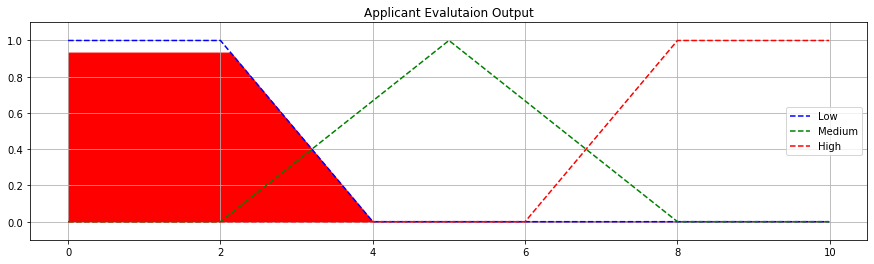

Output: ₹ 1.0650000000000002 x 10^5 


In [10]:
applicant_worth = make_decision(10,5)

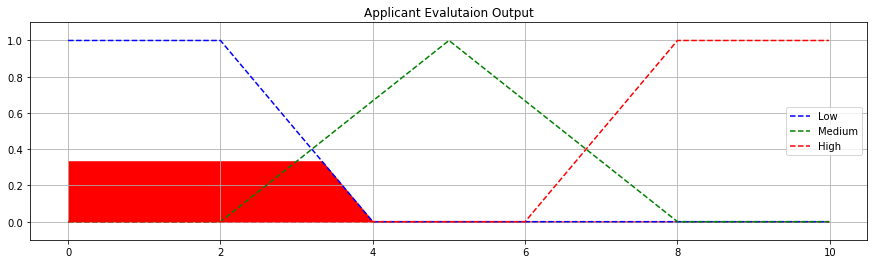

Output: ₹ 1.6649999999999996 x 10^5 


In [11]:
applicant_worth = make_decision(100,10)

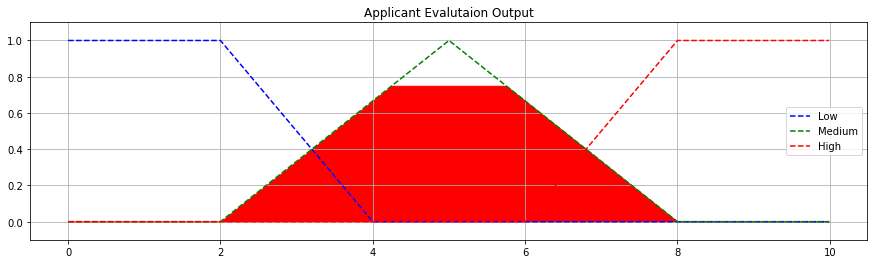

Output: ₹ 5.0 x 10^5 


In [16]:
applicant_worth = make_decision(500,40)

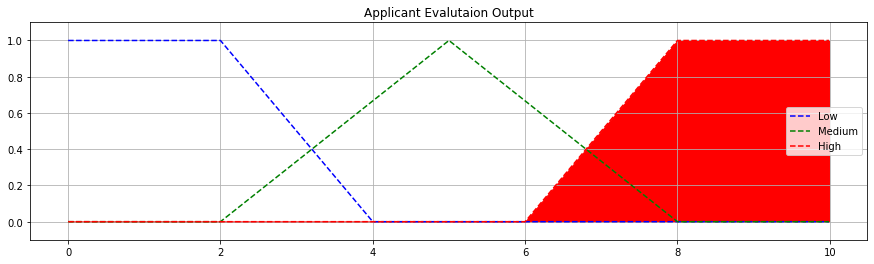

Output: ₹ 8.995 x 10^5 


In [18]:
applicant_worth = make_decision(800,80)

In [20]:
def apply_house_rules(market_value, location, verbose=0):
    # house market value functions
    market_level_low = fuzz.interp_membership(x_house_market, market_low, market_value)
    market_level_medium = fuzz.interp_membership(x_house_market, market_medium, market_value)
    market_level_high = fuzz.interp_membership(x_house_market, market_high, market_value)
    market_level_very_high = fuzz.interp_membership(x_house_market, market_very_high, market_value)

    # house location
    location_level_bad = fuzz.interp_membership(x_house_location, location_bad, location)
    location_level_fair = fuzz.interp_membership(x_house_location, location_fair, location)
    location_level_excellent = fuzz.interp_membership(x_house_location, location_excellent, location)
    
    ### rules
    # 1. If (Market_value is Low) then (House is Low)
    house_act_low1 = np.fmin(market_level_low, house_low)
    # 2. If (Location is Bad) then (House is Low)
    house_act_low2 = np.fmin(location_level_bad, house_low)
    # 3. If (Location is Bad) and (Market_value is Low) then (House is Very_low)
    house_act_very_low = and_rule(location_level_bad, market_level_low, house_very_low)
    # 4. If (Location is Bad) and (Market_value is Medium) then (House is Low)
    house_act_low3 = and_rule(location_level_bad, market_level_medium, house_low)
    # 5. If (Location is Bad) and (Market_value is High) then (House is Medium)
    house_act_medium1 = and_rule(location_level_bad, market_level_high, house_medium)
    # 6. If (Location is Bad) and (Market_value is Very_high) then (House is High)
    house_act_high1 = and_rule(location_level_bad, market_level_very_high, house_high)
    # 7. If (Location is Fair) and (Market_value is Low) then (House is Low)
    house_act_low4 = and_rule(location_level_fair, market_level_low, house_low)
    # 8. If (Location is Fair) and (Market_value is Medium) then (House is Medium)
    house_act_medium2 = and_rule(location_level_fair, market_level_medium, house_medium)
    # 9. If (Location is Fair) and (Market_value is High) then (House is High)
    house_act_high2 = and_rule(location_level_fair, market_level_high, house_high)
    # 10. If (Location is Fair) and (Market_value is Very_high) then (House is Very_high)
    house_act_very_high1 = and_rule(location_level_fair, market_level_very_high, house_very_high)
    # 11. If (Location is Excellent) and (Market_value is Low) then (House is Medium)
    house_act_medium3 = and_rule(location_level_excellent, market_level_low, house_medium)
    # 12. If (Location is Excellent) and (Market_value is Medium) then (House is High)
    house_act_high3 = and_rule(location_level_excellent, market_level_medium, house_high)
    # 13. If (Location is Excellent) and (Market_value is High) then (House is Very_high)
    house_act_very_high2 = and_rule(location_level_excellent, market_level_high, house_very_high)
    # 14. If (Location is Excellent) and (Market_value is Very_high) then (House is Very_high)
    house_act_very_high3 = and_rule(location_level_excellent, market_level_very_high, house_very_high)

    # combine the rules
    step = or_rule(house_act_low1, house_act_low2, house_act_low3)
    house_act_low = np.fmax(step, house_act_low4)
    
    house_act_medium = or_rule(house_act_medium1, house_act_medium2, house_act_medium3)
    
    house_act_high = or_rule(house_act_high1, house_act_high2, house_act_high3)
    
    house_act_very_high = or_rule(house_act_very_high1, house_act_very_high2, house_act_very_high3)
    
    step = or_rule(house_act_very_low, house_act_low, house_act_medium)
    house = or_rule(step, house_act_high, house_act_very_high)
    
    # if we want to see the graph of the output
    if verbose == 1:
        plt.rcParams["figure.figsize"] = 15, 4
        plt.plot(x_house, house_very_low, 'c', linestyle='--', linewidth=1.5, label='Very Low')
        plt.plot(x_house, house_low, 'b', linestyle='--', linewidth=1.5, label='Low')
        plt.plot(x_house, house_medium, 'g', linestyle='--', linewidth=1.5, label='Medium')
        plt.plot(x_house, house_high, 'r', linestyle='--', linewidth=1.5, label='High')
        plt.plot(x_house, house_very_high, 'y', linestyle='--', linewidth=1.5, label='Very High'),plt.title("House Evaluation Output")
        plt.legend()

        plt.fill_between(x_house, house, color='r')
        plt.ylim(-0.1, 1.1)
        plt.grid(True)
        plt.show()
    
    return house

In [21]:
def make_decision2(market_value, location):
    # defuzzification with mean of maximum
    h_eval = apply_house_rules(market_value, location, verbose=1)
    defuzz_house = fuzz.defuzz(x_house, h_eval, 'mom')
    max_n = np.max(h_eval)


    print ("Output: ", defuzz_house)
    return defuzz_house

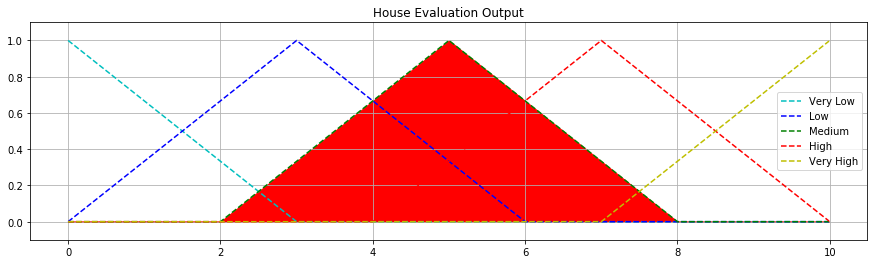

Output:  5.0


In [27]:
house_worth = make_decision2(100,5)

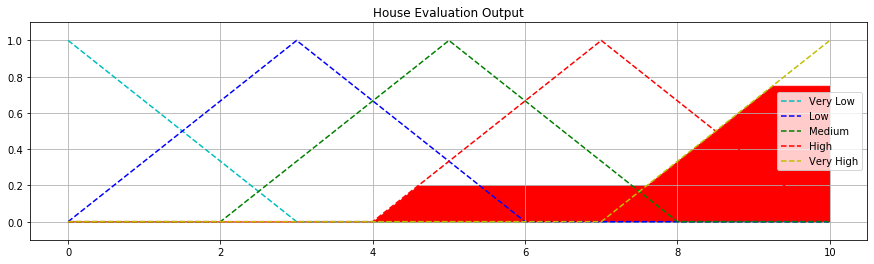

Output:  9.62


In [28]:
house_worth = make_decision2(800,8)

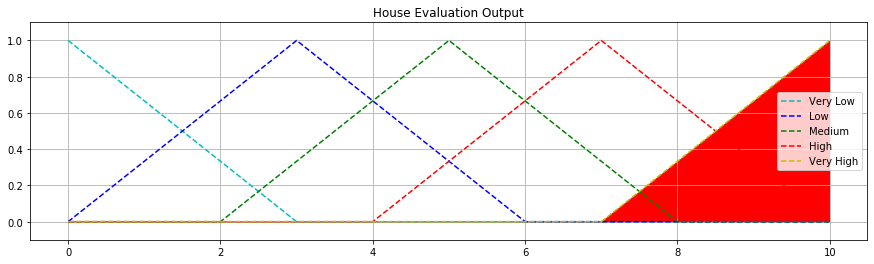

Output:  9.99


In [30]:
house_worth = make_decision2(900,9)

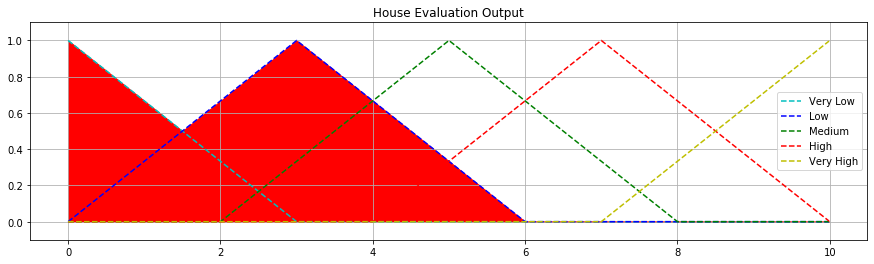

Output:  1.5


In [31]:
house_worth = make_decision2(10,1)

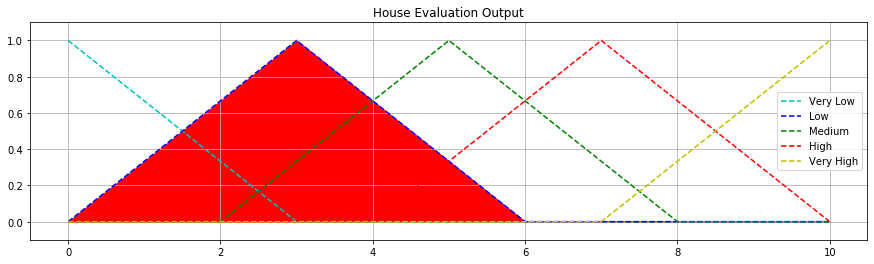

Output:  3.0


In [18]:
house_worth = make_decision2(1,30)